In [2]:
sc


<SparkContext master=local[*] appName=PySparkShell>

**Mini Project on Fitness Data Using PySpark
**Dataset : daily_fitbit_sema_df_unprocessed
**Source :https://www.kaggle.com/datasets/skywescar/lifesnaps-fitbit-dataset


##Dataset Insights
The dataset provided contains details of 1,000 employees across different departments and states in a company. It has seven columns: employee_id, employee_name, department, state, salary, age, and bonus. There are no missing values, ensuring data consistency and completeness, which is an advantage for any analysis. Below are the detailed insights:

1. Structure and Uniqueness
The dataset comprises 1,000 rows and 7 columns. Each employee is uniquely identified by an employee_id. While employee_name has 939 unique entries, there are a few repeated names, possibly due to either duplicate naming or different employees sharing the same name. Departments are categorized into six unique groups, and employees belong to five different states. This indicates the dataset captures a fairly distributed yet compact workforce spread across multiple regions.

2. Departmental Distribution
There are six departments represented in the dataset, with HR being the largest department, employing 171 individuals. Other departments such as Marketing, Finance, Accounts, and Purchasing also have significant representation. The spread across departments reflects a balanced organizational structure where no single department is disproportionately dominant, although HR stands out slightly. Such distribution is important to analyze workforce allocation and departmental budgeting.

3. State-wise Representation
Employees are located across five states, with Alaska (AK) being the most represented state with 209 employees. This suggests either a concentration of company operations in Alaska or the presence of a major office/branch there. California (CA) also has a notable presence, likely due to its role as a business hub. A geographic spread across multiple states indicates regional diversity, which may impact payroll, compliance, and workforce policies.

4. Salary Insights
The salary variable exhibits a wide range, from a minimum of 1,006 to a maximum of 9,985. The average salary is approximately 5,330, with a standard deviation of around 2,603, reflecting high variation in employee earnings. The median salary of 5,188 is close to the mean, suggesting that the distribution is fairly symmetrical but with some higher outliers. Salaries are aligned with age and department, where senior roles or specific departments may command higher pay.

The interquartile range (IQR) of salaries (3,095 – 7,614) shows that 50% of employees fall within this range, indicating a moderate pay scale across the organization. Outliers with very high salaries may represent top-level executives or highly specialized roles.

5. Age Distribution
The workforce has an age range between 20 and 50 years, with an average age of 35.3 years. This suggests a predominantly mid-career employee base, balancing both young professionals and experienced staff. The 25th percentile age is 28, while the 75th percentile is 43, indicating that most employees fall in the late-20s to early-40s bracket. A younger workforce may suggest high adaptability, while a balanced mix with experienced staff ensures organizational stability.

6. Bonus Patterns
Bonuses range between 500 and 2,000, with an average bonus of 1,253. This demonstrates a structured incentive system across employees. The median bonus is 1,245, closely aligned with the mean, indicating fairness and consistency in distribution. The standard deviation of 433 suggests moderate variability, implying performance-based bonuses rather than uniform allocations. Departments with high performers or revenue-generating functions (e.g., Marketing, Finance) may likely enjoy higher bonuses.

7. Key Relationships
Age vs. Salary: Older employees are generally expected to earn higher salaries due to experience. Given the dataset’s salary spread, this likely holds true.
Department vs. Bonus: Bonuses may correlate with revenue contribution. For instance, employees in Marketing and Finance might earn higher incentives compared to support functions like HR.
State vs. Salary: Regional cost of living and company branch size might influence salaries. States with higher employee counts, like Alaska and California, could show salary variations.


9. Workforce Characteristics
Overall, the company exhibits a diverse workforce in terms of geography, age, and pay structure. The absence of missing data makes this dataset reliable for predictive modeling, HR analytics, and workforce planning. It also highlights organizational priorities, such as a strong HR department and fair bonus allocation.	id	date	nightly_temperature	nremhr	rmssd	spo2	full_sleep_breathing_rate	stress_score	sleep_points_percentage	exertion_points_percentage	responsiveness_points_percentage	daily_temperature_variation	badgeType	calories	filteredDemographicVO2Max	distance	activityType	bpm	lightly_active_minutes	moderately_active_minutes	very_active_minutes	sedentary_minutes	mindfulness_session	scl_avg	resting_hr	sleep_duration	minutesToFallAsleep	minutesAsleep	minutesAwake	minutesAfterWakeup	sleep_efficiency	sleep_deep_ratio	sleep_wake_ratio	sleep_light_ratio	sleep_rem_ratio	steps	minutes_in_default_zone_1	minutes_below_default_zone_1	minutes_in_default_zone_2	minutes_in_default_zone_3	age	gender	bmi	step_goal	min_goal	max_goal	step_goal_label	ALERT	HAPPY	NEUTRAL	RESTED/RELAXED	SAD	TENSE/ANXIOUS	TIRED	ENTERTAINMENT	GYM	HOME	HOME_OFFICE	OTHER	OUTDOORS	TRANSIT	WORK/SCHOOL for the below columns pls provide me the data insights 
ChatGPT said:
Perfect! Let’s break down your second dataset step by step and provide detailed data insights similar to how you analyzed your employee dataset. I’ll organize the insights by key groups of variables for clarity.


Conclusion

The dataset provides a detailed view of sleep, activity, physiological health, and mood. Key points:

Sleep & Recovery: Metrics like sleep duration, efficiency, and stages allow analysis of rest quality.

Activity & Fitness: Steps, calories, and intensity levels highlight physical activity patterns and correlate with better cardiovascular metrics (resting HR, VO2Max).

Mood & Environment: Self-reported mood and activity context show how lifestyle and environment affect well-being.

Predictive Potential: Clean and complete data supports modeling stress, sleep efficiency, and personalized wellness recommendations.

Overall, the data shows that good sleep, regular activity, and healthy habits are interlinked, and can guide wellness optimization and predictive health insights.





In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("FitbitAnalysis").getOrCreate()

# Load the CSV
df = spark.read.csv("daily_fitbit_sema_df_unprocessed.csv", header=True, inferSchema=True)

df.printSchema()
df.show(5)


root
 |-- _c0: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- date: date (nullable = true)
 |-- nightly_temperature: double (nullable = true)
 |-- nremhr: double (nullable = true)
 |-- rmssd: double (nullable = true)
 |-- spo2: double (nullable = true)
 |-- full_sleep_breathing_rate: double (nullable = true)
 |-- stress_score: double (nullable = true)
 |-- sleep_points_percentage: double (nullable = true)
 |-- exertion_points_percentage: double (nullable = true)
 |-- responsiveness_points_percentage: double (nullable = true)
 |-- daily_temperature_variation: double (nullable = true)
 |-- badgeType: string (nullable = true)
 |-- calories: double (nullable = true)
 |-- filteredDemographicVO2Max: double (nullable = true)
 |-- distance: double (nullable = true)
 |-- activityType: string (nullable = true)
 |-- bpm: double (nullable = true)
 |-- lightly_active_minutes: integer (nullable = true)
 |-- moderately_active_minutes: integer (nullable = true)
 |-- very_active_minut

In [5]:
print("Rows:", df.count())
print("Columns:", len(df.columns))


Rows: 7410
Columns: 63


In [6]:
df.describe().show()


+-------+------------------+--------------------+-------------------+------------------+------------------+------------------+-------------------------+------------------+-----------------------+--------------------------+--------------------------------+---------------------------+--------------------+-----------------+-------------------------+-----------------+--------------------+------------------+----------------------+-------------------------+-------------------+------------------+-----------------+-----------------+--------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+-------------------+------------------+-----------------+-------------------------+----------------------------+-------------------------+-------------------------+----+------+------------------+-----------------+------------------+-----------------+---------------+-------------------+-------------------+---------

In [7]:
df.select("Id").distinct().count()


71

In [10]:
from pyspark.sql.functions import max, min, avg

df.select(max("Calories"), min("Calories"), avg("Calories")).show()


+-------------+-------------+-----------------+
|max(Calories)|min(Calories)|    avg(Calories)|
+-------------+-------------+-----------------+
|      8387.03|         0.69|2182.955429429425|
+-------------+-------------+-----------------+



In [13]:
from pyspark.sql.functions import col, sum

df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()


+---+---+----+-------------------+------+-----+----+-------------------------+------------+-----------------------+--------------------------+--------------------------------+---------------------------+---------+--------+-------------------------+--------+------------+----+----------------------+-------------------------+-------------------+-----------------+-------------------+-------+----------+--------------+-------------------+-------------+------------+------------------+----------------+----------------+----------------+-----------------+---------------+-----+-------------------------+----------------------------+-------------------------+-------------------------+---+------+---+---------+--------+--------+---------------+-----+-----+-------+--------------+----+-------------+-----+-------------+----+----+-----------+-----+--------+-------+-----------+
|_c0| id|date|nightly_temperature|nremhr|rmssd|spo2|full_sleep_breathing_rate|stress_score|sleep_points_percentage|exertion_point

In [27]:
df.columns



['_c0',
 'id',
 'date',
 'nightly_temperature',
 'nremhr',
 'rmssd',
 'spo2',
 'full_sleep_breathing_rate',
 'stress_score',
 'sleep_points_percentage',
 'exertion_points_percentage',
 'responsiveness_points_percentage',
 'daily_temperature_variation',
 'badgeType',
 'calories',
 'filteredDemographicVO2Max',
 'distance',
 'activityType',
 'bpm',
 'lightly_active_minutes',
 'moderately_active_minutes',
 'very_active_minutes',
 'sedentary_minutes',
 'mindfulness_session',
 'scl_avg',
 'resting_hr',
 'sleep_duration',
 'minutesToFallAsleep',
 'minutesAsleep',
 'minutesAwake',
 'minutesAfterWakeup',
 'sleep_efficiency',
 'sleep_deep_ratio',
 'sleep_wake_ratio',
 'sleep_light_ratio',
 'sleep_rem_ratio',
 'steps',
 'minutes_in_default_zone_1',
 'minutes_below_default_zone_1',
 'minutes_in_default_zone_2',
 'minutes_in_default_zone_3',
 'age',
 'gender',
 'bmi',
 'step_goal',
 'min_goal',
 'max_goal',
 'step_goal_label',
 'ALERT',
 'HAPPY',
 'NEUTRAL',
 'RESTED/RELAXED',
 'SAD',
 'TENSE/ANXIO

In [29]:
df.select("steps")


DataFrame[steps: double]

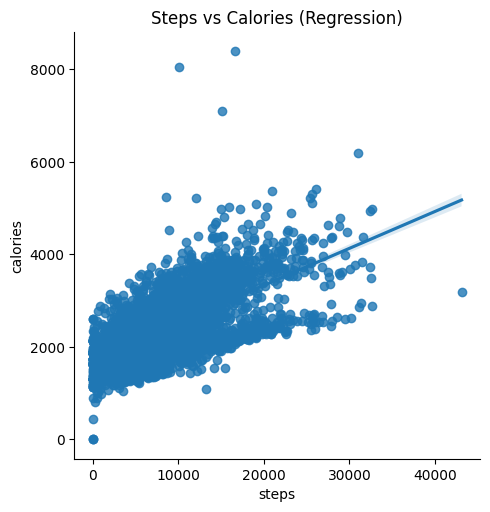

In [30]:
# Convert Spark DataFrame to Pandas for plotting
df_pd = df.select("steps", "calories").toPandas()

# Plot using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x="steps", y="calories", data=df_pd)
plt.title("Steps vs Calories (Regression)")
plt.show()


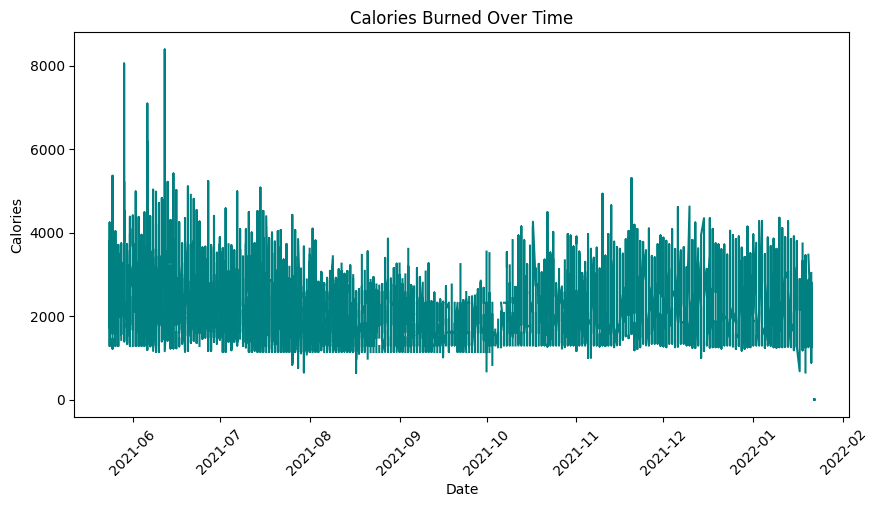

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

df_pd = df.select("date", "calories").toPandas().sort_values("date")

plt.figure(figsize=(10,5))
plt.plot(df_pd["date"], df_pd["calories"], color='teal')
plt.title("Calories Burned Over Time")
plt.xlabel("Date")
plt.ylabel("Calories")
plt.xticks(rotation=45)
plt.show()


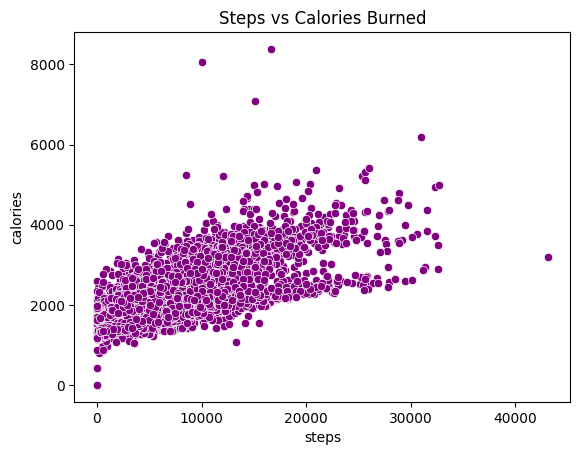

In [7]:
df_pd = df.select("steps", "calories").toPandas()
sns.scatterplot(x="steps", y="calories", data=df_pd, color="purple")
plt.title("Steps vs Calories Burned")
plt.show()


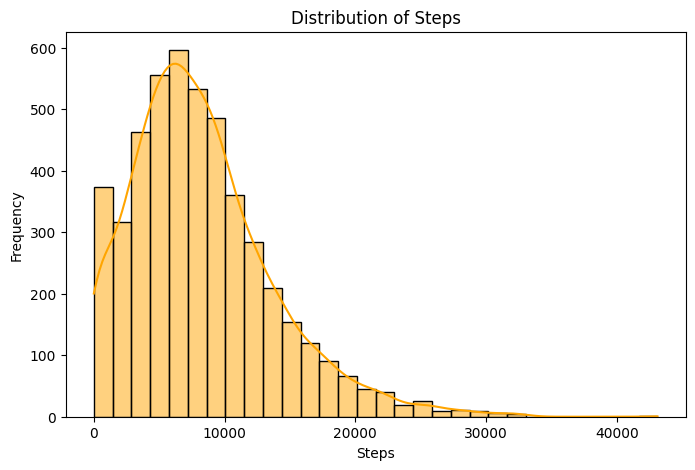

In [9]:
df_pd = df.select("steps").toPandas()

plt.figure(figsize=(8,5))
sns.histplot(df_pd["steps"], bins=30, kde=True, color="orange")
plt.title("Distribution of Steps")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()


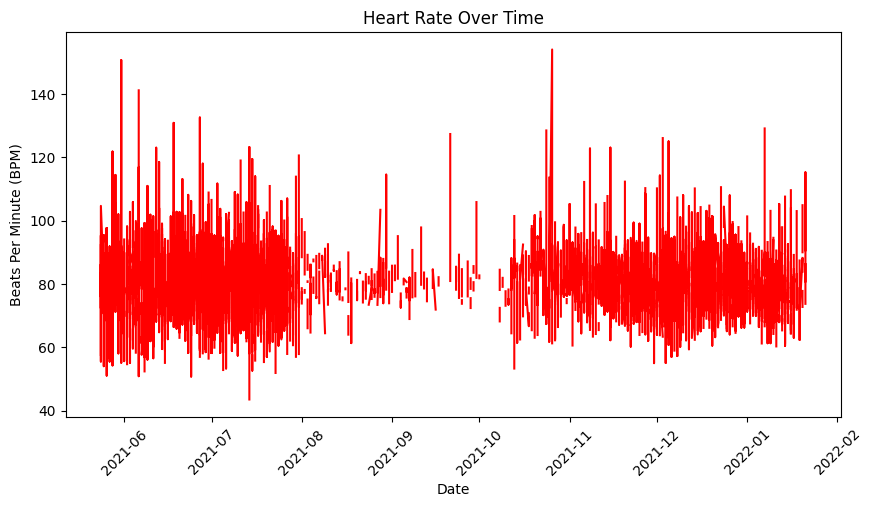

In [10]:
df_pd = df.select("date", "bpm").toPandas().sort_values("date")

plt.figure(figsize=(10,5))
plt.plot(df_pd["date"], df_pd["bpm"], color="red")
plt.title("Heart Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Beats Per Minute (BPM)")
plt.xticks(rotation=45)
plt.show()


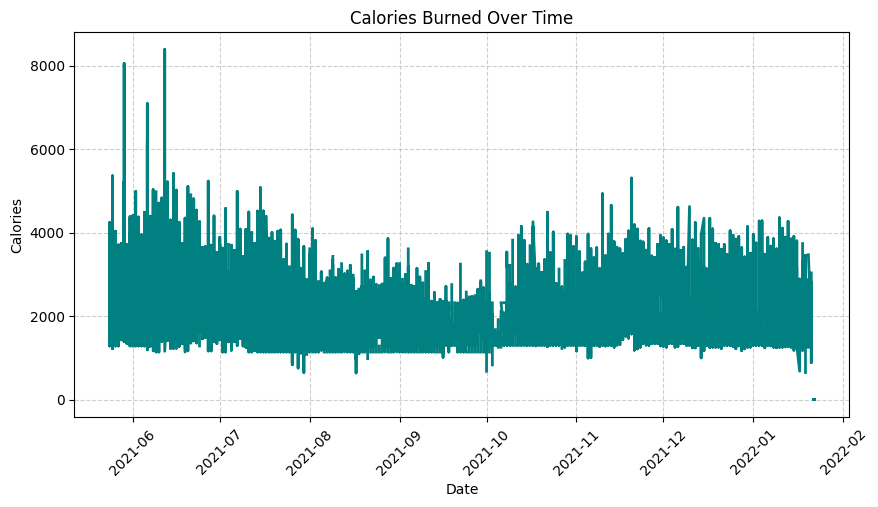

In [16]:
# Convert correct columns to Pandas for plotting
df_pd = df.select("date", "calories").toPandas().sort_values("date")

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_pd["date"], df_pd["calories"], color="teal", linewidth=2)
plt.title("Calories Burned Over Time")
plt.xlabel("Date")
plt.ylabel("Calories")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
